In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 23) 
mpl.rc('ytick', labelsize = 23)

In [3]:
# suppress warning outputs for using lal in jupuyter notebook
import warnings 
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import GWFish.modules as gw

In [15]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#eba75f'
my_color2_darker = '#f6b26b'

In [7]:
PATH_TO_INJECTIONS = '/Users/ulyanadupletsa/Documents/Paper2_Review/results/injections/'

event = 'IGWN-GWTC2p1-v2-GW150914_095045_PEDataRelease_mixed_cosmo'
params = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']
waveform = 'IMRPhenomXPHM'

In [8]:
gw150914_data = pd.read_hdf(PATH_TO_INJECTIONS + event + '/%s_%s_median.hdf5' %(event, waveform))

In [12]:
# Plot the time before the merger as a function of the frequency
detector = 'ET'
_, t_of_f = gw.utilities.get_fd_signal(gw150914_data, detector, waveform, 20)

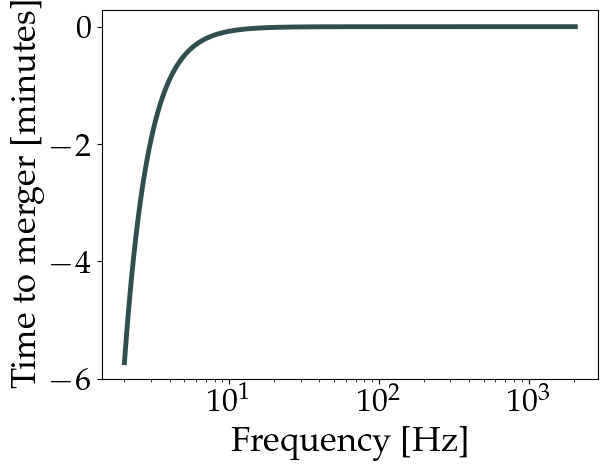

In [20]:
convert_from_seconds_to_minutes = 60
frequency = gw.detection.Detector(detector).frequencyvector[:, 0]
plt.semilogx(frequency, (t_of_f - gw150914_data['geocent_time'].iloc[0]) / convert_from_seconds_to_minutes, 
             color=my_color_darker, linewidth=3.5)
plt.xlabel('Frequency [Hz]', fontsize=25)
plt.ylabel('Time to merger [minutes]', fontsize=25)
plt.savefig('plots/t_of_f_gw150914.pdf', bbox_inches='tight')
plt.show()